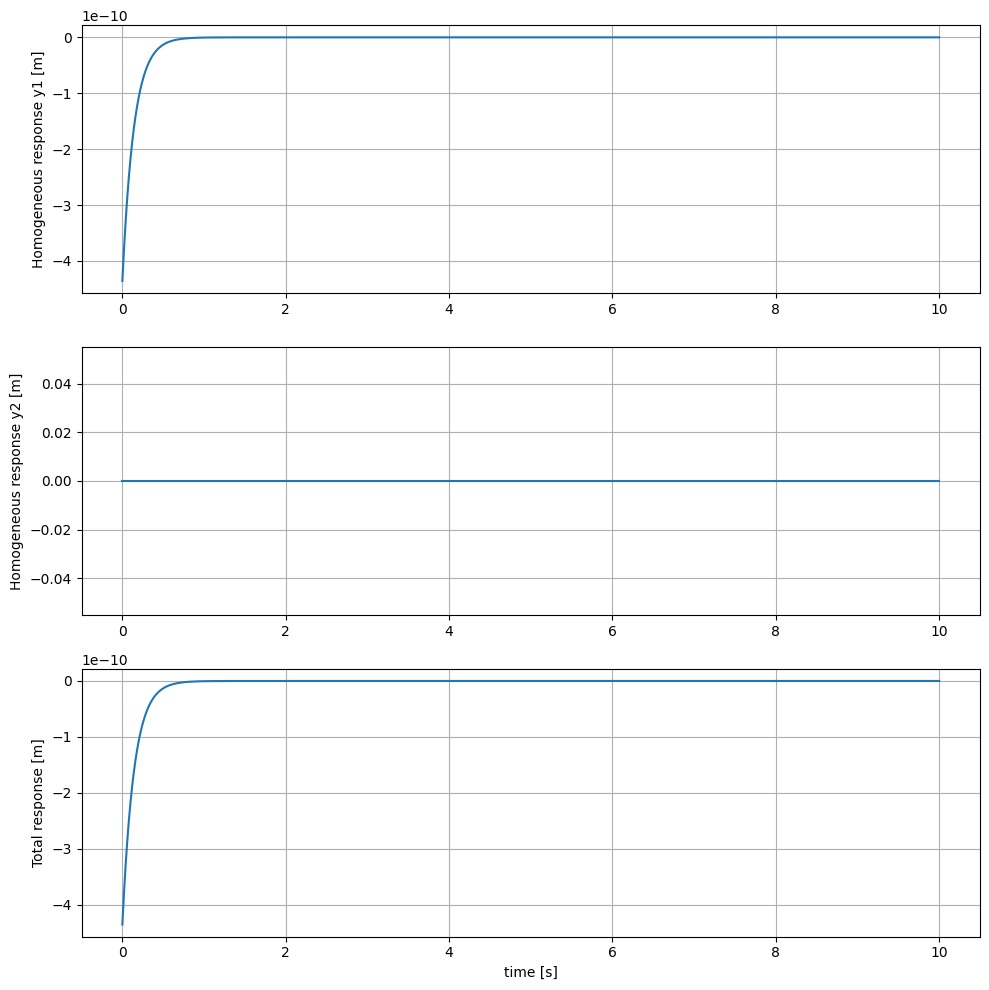

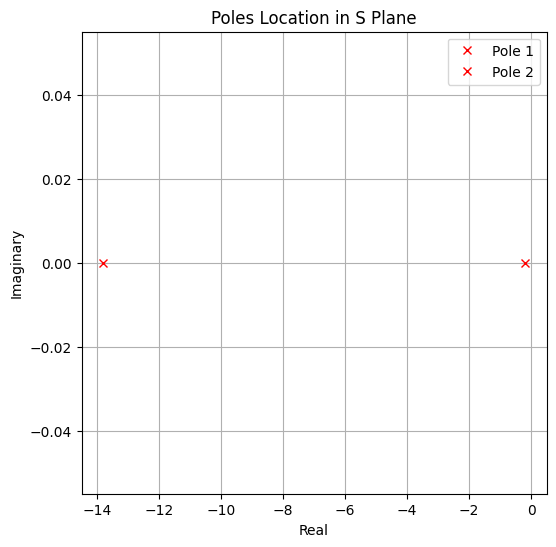

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
k = 125  # N/cm
b = 700  # Ns/cm
m = 50   # kg

# Strong damper
# Speed is seriously resisted

# Then, from (3.51)
sigma = 7
rho = 2.5
eta = 0.02

# Consequently, the two system poles are
alpha1 = -0.181
alpha2 = -13.819

# Initial conditions
t = np.arange(0, 10.01, 0.01)
y0 = [0, 0]

# Determination of poles
d = 0
if d > 0:
    alpha1 = -sigma + np.sqrt(d)
    alpha2 = -sigma - np.sqrt(d)
    p1 = alpha1
    p2 = alpha2
    q1 = -1 / (alpha1 * (alpha1 - alpha2))
    q2 = -1 / (alpha2 * (alpha2 - alpha1))
    q3 = 1 / (alpha1 * alpha2)
    y1 = np.exp(p1 * t) * (p2 * q1 * np.exp(alpha1 * t) + p1 * q2 * np.exp(alpha2 * t))
    y2 = np.exp(p2 * t) * (p1 * q1 * np.exp(alpha2 * t) + p2 * q2 * np.exp(alpha1 * t))
else:
    omega = np.sqrt(-d)
    phi = np.arctan2(rho, (k * (2 - sigma) * k * (2 - sigma) + omega * omega))
    p = -sigma + 1j * omega
    k = np.sqrt(k * (2 - sigma) * k * (2 - sigma) + omega * omega)
    ym = np.exp(-sigma * t) * (np.sin(omega * eta + phi))
    yel = np.exp(-sigma * t) * (np.sin(omega * eta + phi))
    ym = ym / (k * (2 - sigma * sigma))
    yel = yel / (k * (2 - sigma * sigma))
    y1 = ym + yel
    y2 = ym - yel

# Plot graphs
plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.plot(t, y1)
plt.ylabel('Homogeneous response y1 [m]')
plt.grid(True)

plt.subplot(312)
plt.plot(t, y2)
plt.ylabel('Homogeneous response y2 [m]')
plt.grid(True)

plt.subplot(313)
plt.plot(t, y1 + y2)
plt.ylabel('Total response [m]')
plt.xlabel('time [s]')
plt.grid(True)

plt.tight_layout()

# Plot poles in the complex plane
plt.figure(figsize=(6, 6))
plt.plot(np.real(alpha1), np.imag(alpha1), 'rx', label='Pole 1')
plt.plot(np.real(alpha2), np.imag(alpha2), 'rx', label='Pole 2')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Poles Location in S Plane')
plt.legend()
plt.grid(True)

plt.show()
